## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [3]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [4]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 0       4       4       8       0       

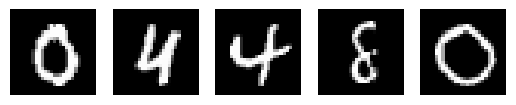

In [5]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [6]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(-1, 28*28) / 255.0
x_test_flatten = x_test.reshape(-1, 28*28) / 255.0


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation


x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]

### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [7]:
model = keras.models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [8]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

n_epochs = 100
batch_size = 512

history = model.fit(x_train_flatten, y_train,
                    epochs=n_epochs,
                    batch_size=batch_size,
                    validation_data=(x_validation, y_validation))

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7184 - loss: 1.0472 - val_accuracy: 0.9240 - val_loss: 0.2698
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9271 - loss: 0.2546 - val_accuracy: 0.9417 - val_loss: 0.2002
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9457 - loss: 0.1873 - val_accuracy: 0.9514 - val_loss: 0.1670
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9583 - loss: 0.1465 - val_accuracy: 0.9567 - val_loss: 0.1491
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9655 - loss: 0.1190 - val_accuracy: 0.9622 - val_loss: 0.1283
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9702 - loss: 0.1034 - val_accuracy: 0.9631 - val_loss: 0.1211
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9758 - loss: 0.0841 - val_accuracy: 0.9663 - val_loss: 0.1113
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9776 - loss: 0.0791 - val_accuracy: 0.

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9729 - loss: 0.1641
Loss =  0.14862415194511414
Accuracy =  97.65999913215637 %


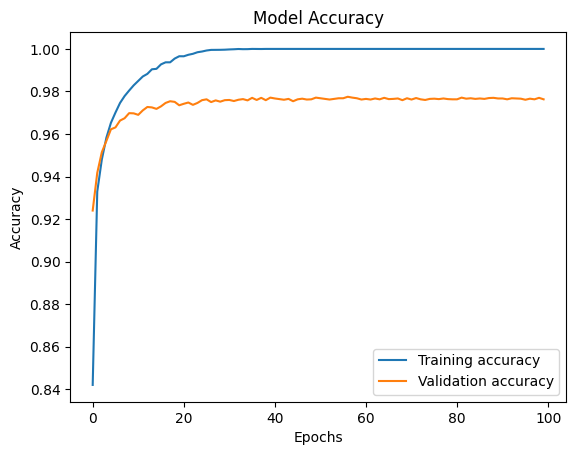

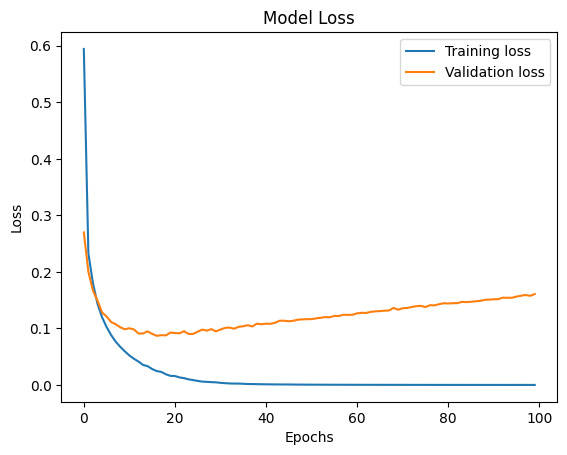

In [9]:
results = model.evaluate(x_test_flatten, y_test)
print("Loss = ", results[0])
print("Accuracy = ", results[1] * 100, "%")

# Plot accuracy
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Lets show our results on images from testing dataset

Label:
7    0    0    6    2    

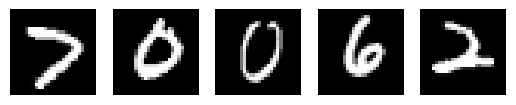

Predicted value:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
7    0    0    6    2    

In [11]:
n = 5
index = np.random.choice(x_test.shape[0], n)
print("Label:")

for i, ind in enumerate(index):
    plt.subplot(1, n, i + 1)
    plt.imshow(x_test[ind], cmap="gray")
    plt.axis("off")
    print(y_test[ind], end="    ")
plt.show()

print("Predicted value:")

predictions = model.predict(x_test_flatten[index])
for p in predictions:
    digit = np.argmax(p)
    print(digit, end="    ")